<a href="https://colab.research.google.com/github/thompf2/Machine-Learning-Engineering/blob/main/MLE_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOMEWORK #1

FAYDIA THOMPSON (RIN: 662020314)


PROBLEM 1:

A. There are 5 features in $x_{1}$ and 4 features in $x_{2}$.

B. For $x_{1}$:

$L_{1}$: 26

$L_{2}$: 13.19090595827292

$L_{\infty}$: 9

For $x_{2}$:

$L_{1}$: 98

$L_{2}$: 89.16277250063504

$L_{\infty}$: 89



In [ ]:
import numpy as np

x1 = np.array([[2], [3], [4], [8], [9]])
x1 = np.abs(x1)
x2 = np.array([[2], [-3], [-4], [89]])
x2 = np.abs(x2)

# FOR X1
L11 = 0
L12 = 0
L1inf = 0

for i in range(x1.shape[0]):
    L11 += x1[i, 0]

L12 = x1 @ x1.T
eigenvalues, eigenvectors = np.linalg.eig(L12)
L12 = np.max(eigenvalues)
L12 = np.sqrt(L12)

L1inf = np.max(x1);

# FOR X2
L21 = 0
L22 = 0
L2inf = 0

for i in range(x2.shape[0]):
    L21 += x2[i, 0]

L22 = x2 @ x2.T
eigenvalues, eigenvectors = np.linalg.eig(L22)
L22 = np.max(eigenvalues)
L22 = np.sqrt(L22)

L2inf = np.max(x2);

# print results
# for x1
print(f"x1 1-Norm is: {L11}")
print(f"x1 2-Norm is: {L12}")
print(f"x1 Infinity-Norm is: {L1inf}")
# for x2
# Print the results
print(f"x2 1-Norm is: {L21}")
print(f"x2 2-Norm is: {L22}")
print(f"x2 Infinity-Norm is: {L2inf}")




x1 1-Norm is: 26
x1 2-Norm is: 13.19090595827292
x1 Infinity-Norm is: 9
x2 1-Norm is: 98
x2 2-Norm is: 89.16277250063504
x2 Infinity-Norm is: 89


PROBLEM 2:

A. The length of the feature vector is 3,145,728

B. The length of the output vector is 12,288

C. The number of elements in W is 38,654,705,664. The number of elements in b is 12,288.

In [ ]:
length_x = 1024**2
length_y = 64**2

# three channels: red, green, and blue
length_x = 3*length_x
length_y = 3*length_y

print(f"The length of the feature vector, x, is {length_x}")
print(f"The length of the output vector, y, is {length_y}")

W = np.zeros((length_y, length_x))  # W has shape (length_y, length_x)
b = np.zeros(length_y)              # b has shape (length_y)

# Number of elements in W and b
elements_W = W.size
elements_b = b.size

print(f"Number of elements in W: {elements_W}")
print(f"Number of elements in b: {elements_b}")


The length of the feature vector, x, is 3145728
The length of the output vector, y, is 12288
Number of elements in W: 38654705664
Number of elements in b: 12288


PROBLEM 3:

W 1-Norm is: 3.0

W 2-Norm is: 2.288245611270737

W Infinity-Norm is: 2.0

W Frobenius-Norm is: 2.449489742783178

In [ ]:
W = ([[1, -1], [2, 0]])
W = np.abs(W)

L1 = np.zeros(W.shape[1])
L2 = 0
Linf = np.zeros(W.shape[0])
Fnorm = 0

for j in range(W.shape[1]):
  for i in range(W.shape[0]):
    L1[j] += W[i, j]

L1 = np.max(L1)

L2 = W @ W.T
eigenvalues, eigenvectors = np.linalg.eig(L2)
L2 = np.max(eigenvalues)
L2 = np.sqrt(L2)

for i in range(W.shape[0]):
  Linf[i] = np.sum(np.abs(W[i, :]))

Linf = np.max(Linf);

Fnorm = np.sqrt(np.sum(W**2))

# print results
print(f"W 1-Norm is: {L1}")
print(f"W 2-Norm is: {L2}")
print(f"W Infinity-Norm is: {Linf}")
print(f"W Frobenius-Norm is: {Fnorm}")


W 1-Norm is: 3.0
W 2-Norm is: 2.288245611270737
W Infinity-Norm is: 2.0
W Frobenius-Norm is: 2.449489742783178


PROBLEM 4:

The new accuracy score choosing the first 3 out of 4 original features instead of 2 is 0.9333333333333333


In [1]:
from sklearn import datasets

iris = datasets.load_iris()

iris.data

iris.feature_names

iris.target_names

iris.target

X = iris.data[:, :3] # only selecting first three features
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)


[1 1 1 1 0 2 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 2 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 2 0 0 1 1 2 1 2 1 1 2 1 1]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.9333333333333333


PROBLEM 5:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


<ipython-input-4-c38507837ddb>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


[1.0] => 1.27 (expected 1.00)
[4.0] => 1.29 (expected 1.22)
[9.0] => 1.33 (expected 1.37)
[16.0] => 1.39 (expected 1.49)
[25.0] => 1.46 (expected 1.58)
[36.0] => 1.55 (expected 1.67)
[49.0] => 1.65 (expected 1.74)
[64.0] => 1.77 (expected 1.81)
[81.0] => 1.91 (expected 1.87)
[100.0] => 2.06 (expected 1.93)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


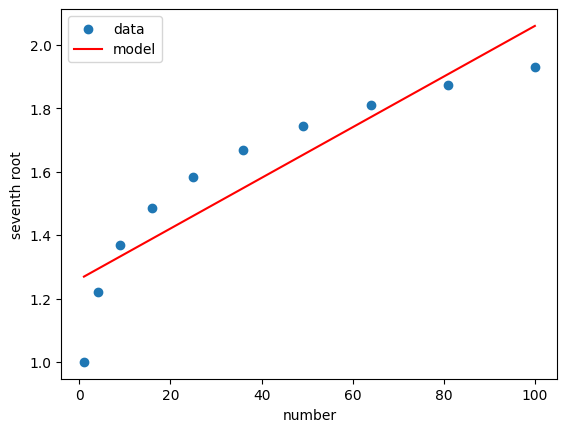

In [4]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Load dataset
#split into input (X) and output (y)
X = np.array([[1], [4], [9], [16], [25], [36], [49], [64], [81], [100]])
X = X*1.0
y = np.array([[1], [1.2190], [1.3687], [1.4860], [1.5838], [1.6685], [1.7436], [1.8114], [1.8734], [1.9307]])
y = y*1.0

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('seventh root')
plt.legend()

PROBLEM 6:



In [3]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np

#Load dataset
#define input (X) and output (y)
from sklearn import datasets

iris = datasets.load_iris()
iris.data

X = iris.data[:, 0] # only selecting sepal length
y = iris.data[:, 2] # only selecting petal length

# Reshape the data to ensure it's in the correct shape for the neural network
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
)

#define keras model (neural network)
model = Sequential()
model.add(Dense(10,input_dim=1,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0) # model is trying to learn here
model.summary()
#make class predictions with the model
predictions = model.predict(X_test)
#summarize the first 10 cases
for i in range(len(X_test)):
  print('%s => %.2f (expected %.2f)' %(X_test[i].tolist(), predictions[i], y_test[i]))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 755 (2.95 KB)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 504 (1.97 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[6.3] => 4.84 (expected 4.90)
[6.8] => 5.47 (expected 5.50)
[6.4] => 4.97 (expected 5.60)
[5.6] => 3.44 (expected 4.10)
[4.9] => 1.81 (expected 1.40)
[6.0] => 4.37 (expected 4.80)
[6.3] => 4.84 (expected 4.40)
[4.4] => 0.65 (expected 1.30)
[4.4] => 0.65 (expected 1.40)
[5.5] => 3.21 (expected 4.40)
[6.9] => 5.59 (expected 5.10)
[5.5] => 3.21 (expected 1.40)
[5.2] => 2.51 (expected 3.90)
[6.5] => 5.09 (expected 5.50)
[7.7] => 6.59 (expected 6.10)
[6.5] => 5.09 (expected 5.80)
[5.5] => 3.21 (expected 1.30)
[4.3] => 0.42 (expected 1.10)
[6.1] => 4.59 (expected 4.70)
[4.8] => 1.58 (expected 1.40)
[5.2] => 2.51 (expected 1.40)
[6.3] => 4.84 (expected 5.10)
[4.8] => 1.58 (expected 1.90)
[6.1] => 4.59 (expected 4.90)
[5.1] => 2.28 (expected 1.60)
[5.4] => 2.97 (expected 1.70)
[5.4] => 2.97 (expected 1.50)
[5.6] => 3.44 (expected 4.90)
[7.7] => 6.59 (expected 6.70)
[5.0] => 2.04 (expected 1.40)
[7.4] => 6.22 (expected 6.10)
[6.0] => 4.37 (expected 5.00)
[4

<ipython-input-3-6c687ce4b63b>:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X_test[i].tolist(), predictions[i], y_test[i]))
